Alberto Geroldi 968236
# <span style="color:green">Numerical simulation laboratory (NSL)</span>  
# Exercise 8

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [12]:
def error(AV,AV2,n):
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

In [13]:
def blocks(data_file):
    sum1 = 0.
    sum2 = 0.
    y_val = np.zeros((len(data_file), 2))
    for ix in range(len(data_file)):
        sum1 += data_file[ix]
        sum2 += data_file[ix] * data_file[ix]
        AV = sum1 / (ix + 1)
        AV2 = sum2 / (ix + 1)
        y_val[ix,0] = AV
        y_val[ix,1] = error(AV,AV2,ix)
    return y_val

## EX 8.1

Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to **sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$** using an uniform transition probability $T(x_{new}|x_{old})$.

We use data blocking to estimate the expectation value $\langle {\hat H} \rangle_T$ of the hamiltonian:  
$$\hat H = \hat T + x^4 - \frac{5}{2} x^2$$  
with the following trial wave function (ground state wave function):  
$$\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$  
We use $\hbar = 1$ and $m=1$.

In [14]:
with open("data/N_data_8_1.txt") as file:
    N_blocks = int(file.readline())
    N_throws = int(file.readline())
    accepted = float(file.readline())
print(f"N_blocks = {N_blocks}")
print(f"N_throws = {N_throws}")
print(f"accepted = {accepted}")

data = np.loadtxt("data/8_1_H_expect.txt")

N_blocks = 100
N_throws = 100000
accepted = 0.502927


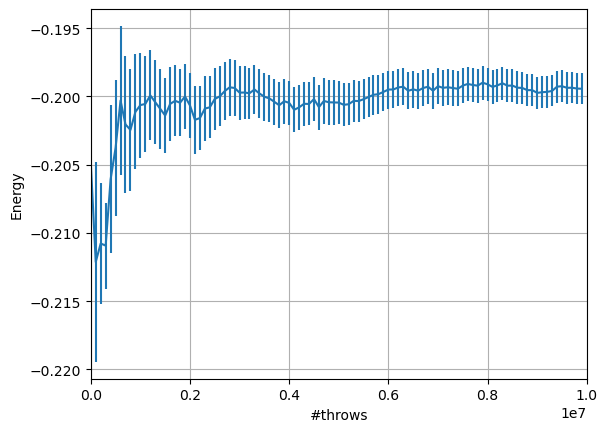

Ground state Energy: -0.1994 ± 0.0011


In [15]:
x = np.arange(N_blocks) * N_throws
hamiltonian = blocks(data)

plt.grid(True)
plt.errorbar(x, hamiltonian[:, 0], yerr=hamiltonian[:, 1]);
plt.xlim(0, 1e7)
plt.xlabel("#throws")
plt.ylabel("Energy")
plt.show()

print(f"Ground state Energy: {hamiltonian[-1, 0]:.4f} ± {hamiltonian[-1, 1]:.4f}")

## EX 8.2

We use simulated annealing (SA) algorithm to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$

In [16]:
with open("data/N_data_8_2.txt") as file:
    N_blocks = int(file.readline())
    N_throws = int(file.readline())
    N_throws_min = int(file.readline())
    T_min = float(file.readline())
    T_max = float(file.readline())
    T_step = float(file.readline())
print(f"N_blocks = {N_blocks}")
print(f"N_throws = {N_throws}")
print(f"N_throws_min = {N_throws_min}")
print(f"T min = {T_min}")
print(f"T max = {T_max}")
print(f"T step = {T_step}")

data_min = np.loadtxt("data/8_2_parameters.txt")

N_blocks = 100
N_throws = 10000
N_throws_min = 1000000
T min = 0.1
T max = 1.0
T step = 0.00018


### 8.2.1

We show $\langle {\hat H} \rangle_T$ as a function of the simulated annealing number of steps. We chose number of steps = 5000  
In every step we decrease the temperature with a temperature step of $0.00018$ starting from a temperature of $1.0$ until we have a T min of  
$0.1$.  
If the step is accepted by the SA algorithm we update the energy and parameters $\mu$ and $\sigma$, if the step is not accepted , we continue with the  
same energy, and the same parameters.  

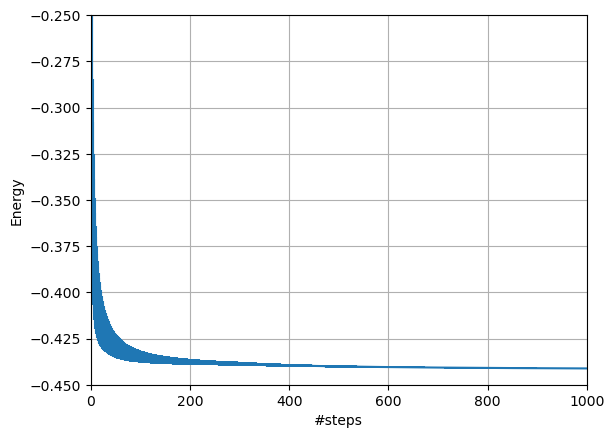

Energy = -0.4427 ± 0.0001
Value of the parameters that minimize the expectation value of the hamiltonian: 
mu = 0.7963
sigma = 0.6150


In [34]:
steps = 5001
h = blocks(data_min[:,0])
x = np.arange(steps)

plt.grid(True)
plt.errorbar(x, h[:, 0], yerr=h[:, 1]);
plt.xlim(0, 1e3)
plt.xlabel("#steps")
plt.ylim(-0.45, -0.25)
plt.ylabel("Energy")
plt.show()
print(f"Energy = {h[-1, 0]:.4f} ± {h[-1, 1]:.4f}")
print("Value of the parameters that minimize the expectation value of the hamiltonian: ")
print(f"mu = {data_min[:,1][-1]:.4f}")
print(f"sigma = {data_min[:,3][-1]:.4f}")

### 8.2.2

We show the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps

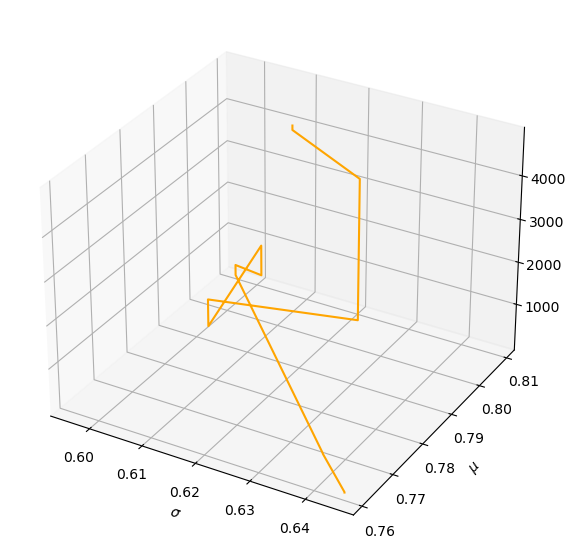

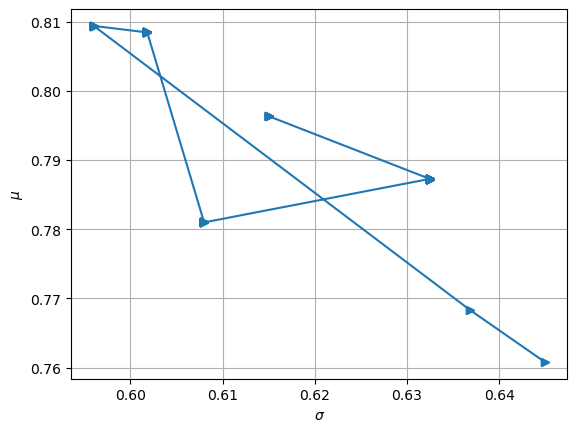

In [35]:
mu = data_min[:,1][2::10]
sigma = data_min[:,3][2::10]
zdata = np.arange(2, steps, 10)

fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.plot3D(sigma, mu, zdata, 'orange')
ax.set_xlabel("$\sigma$")
ax.set_ylabel("$\mu$")
plt.show()

plt.plot(sigma, mu, '->')
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.grid(True)
plt.show()


We see that when the SA algorithm takes the parameters values such that the move is accepted , the algorithm push the parameters in the right  
direction in the parameters space slowing down the temperature. We see that near the values that minimize the energy , parameters vary very slowly. 

### 8.2.3

We show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$.  
We use 10x the number of steps for a better measure of the hamiltonian's expectation value.  
We use the set of parameters which minimize $\langle {\hat H} \rangle_T$:  

$\mu = 0.7963$  
$\sigma = 0.6150$

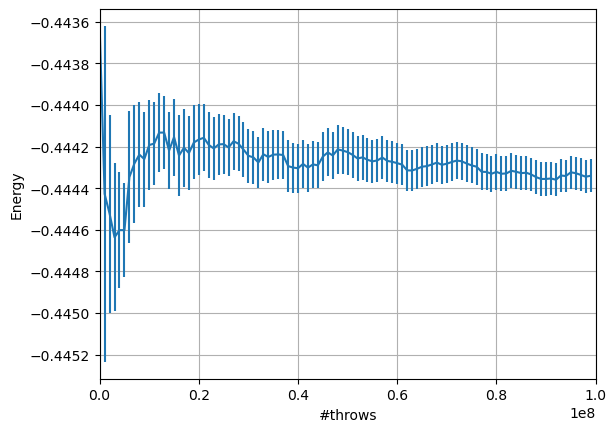

Ground state Energy: -0.44434 ± 0.00008


In [36]:
hamiltonian = blocks(np.loadtxt("data/8_2_minimize.txt"))
x = np.arange(N_blocks) * N_throws_min

plt.grid(True)
plt.errorbar(x, hamiltonian[:, 0], yerr=hamiltonian[:, 1]);
plt.xlim(0, 1e8)
plt.xlabel("#throws")
plt.ylabel("Energy")
plt.show()

print(f"Ground state Energy: {hamiltonian[-1, 0]:.5f} ± {hamiltonian[-1, 1]:.5f}")

### 8.2.4

We sample $|\Psi_T(x)|^2$ and we compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation

Ground state energy:  -0.46046587969259045
1st excited state energy:  0.09742471331819892
2nd excited state energy:  1.9717331343930118


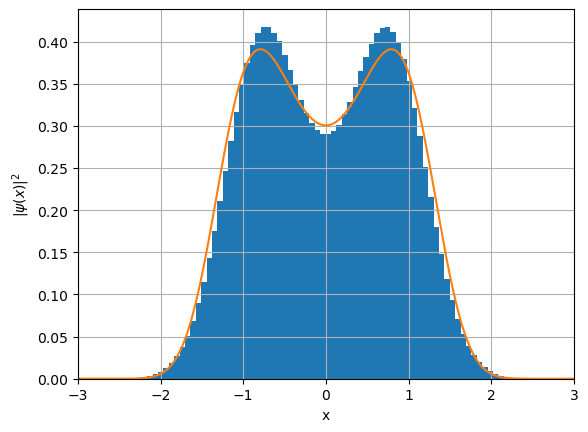

In [37]:
psi2 = np.loadtxt("data/8_2_psi2.txt")
plt.hist(psi2, bins=100, density=True);
x = np.linspace(-3, 3, 1000000)

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2)
plt.xlabel("x")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$")
plt.xlim((-3,3))
plt.show()